Create a machine learning model to predict revenue of the restaurant based on the features
present in the dataset.

In [1]:
'''
Dataset contains 100 observations of restaurants with 8 attributes.

1) Id - Restaurant Id
2) Name - Name of the Restaurant
3) Franchise - Restaurant is having franchise or not
4) Category - specific type of category provided by restaurant
5) City -  Location of restaurant
6) No_of_item - Different types of items provided by restaurant
7) Order_Placed - Order placed by customer to restaurant(in lacs)
8) Revenue - Total amount of income generated by the restaurant
'''

'\nDataset contains 100 observations of restaurants with 8 attributes.\n\n1) Id - Restaurant Id\n2) Name - Name of the Restaurant\n3) Franchise - Restaurant is having franchise or not\n4) Category - specific type of category provided by restaurant\n5) City -  Location of restaurant\n6) No_of_item - Different types of items provided by restaurant\n7) Order_Placed - Order placed by customer to restaurant(in lacs)\n8) Revenue - Total amount of income generated by the restaurant\n'

**Import the libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [3]:
df=pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Revenue prediction\revenue_prediction.csv")

In [4]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


**Examining missing values in a dataset**

In [6]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

**Drop irrelevant columns**

In [7]:
df=df.drop(columns=["Id","Name"])

In [8]:
df.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715


In [9]:
df.shape

(100, 6)

<AxesSubplot: xlabel='Franchise', ylabel='count'>

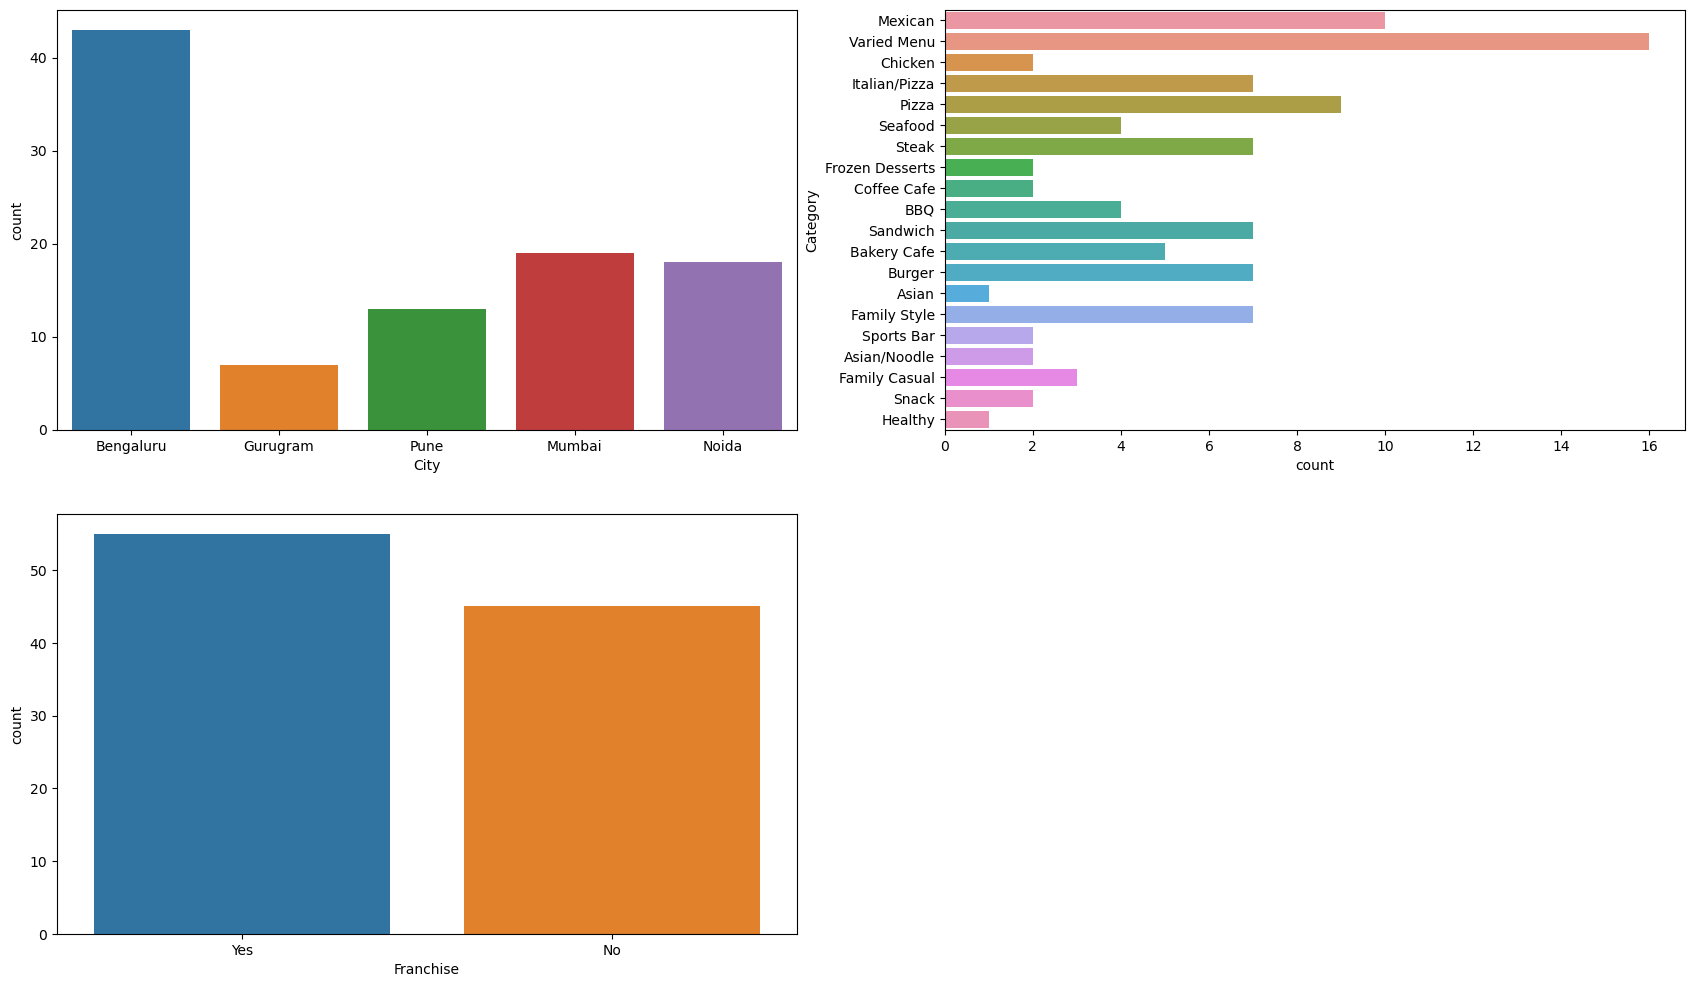

In [10]:
#Visualising data

plt.figure(figsize=(21,12))

plt.subplot(2,2,1)
sns.countplot(df, x=df['City']) #Banglore has highest number of restaurants followed by Mumbai

plt.subplot(2,2,2)
sns.countplot(df, y=df['Category']) 
#Most of the restaurants provide variety of cuisines, but mexican and pizza are top choices in individual category.

plt.subplot(2,2,3)
sns.countplot(df, x=df['Franchise']) #No major imbalance in franchise number.

In [11]:
#Performing One Hot Encoding for categorical features

from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [12]:
col_list=list(df.columns)

for col in col_list:
    if df[col].dtypes=='object':
        df[col]=encode.fit_transform(df[col])
    else:
        continue

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    int32  
 1   Category      100 non-null    int32  
 2   City          100 non-null    int32  
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 3.6 KB


**Heatmap analysis**

<AxesSubplot: >

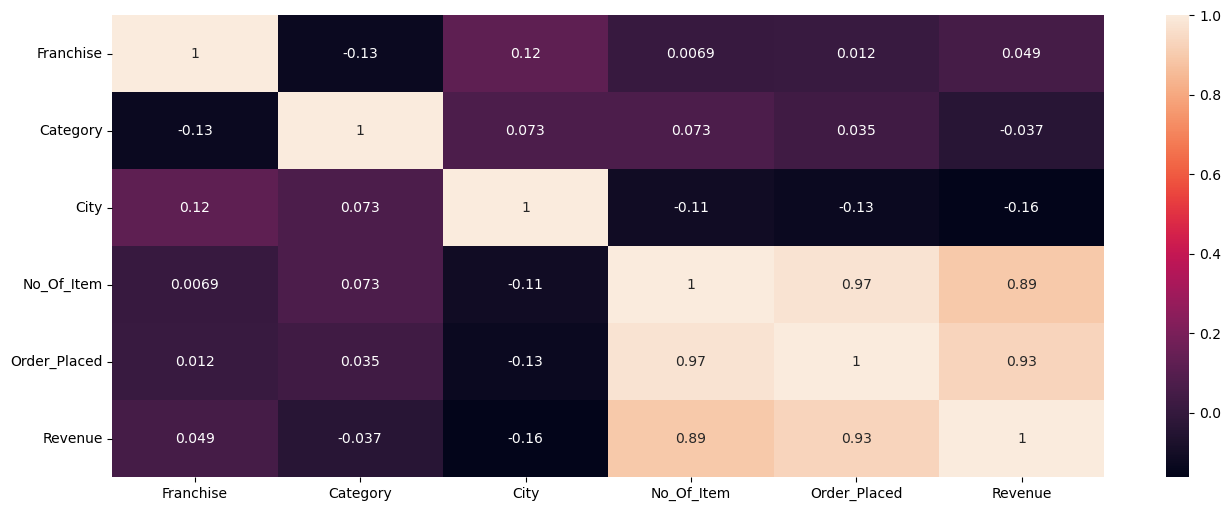

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

#Category and franchise number hardly contributes to restaurant revenue, so can be dropped.

**Create independent feature and dependent variable**

In [14]:
x=df.iloc[:,2:5].values
y=df.iloc[:,-1].values  

**Split the dataset into Training set and Test set**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test)

(75, 3)
(25, 3)
(75,)
[5966193 5595267 3982767 3752885 4264176 3818055 4956086 3727364 3945135
 5953753 4937526 2408199 3347767 2371202 3426169 4816715 4590423 1904842
 2234634 2358644 6941173 2025297 2967425 4952255 3452382]


**Training the Simple Linear Regression model on the Training set**

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [18]:
y_pred=LR.predict(x_test)

**Accuracy of the Model**

In [19]:
from sklearn.metrics import r2_score
print('Accuracy : ',round(r2_score(y_pred,y_test)*100,2),'%')

Accuracy :  90.95 %


**Linear regression gives 91% accuracy**